<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B16_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сватенко Євгеній ФІТ 4-8

Лабораторна робота №6. Запобігання перенавчанню. L1 і L2 регулярізація.


Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.

Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.
1. **Завантаження та підготовка даних:**
o Виберіть вбудований датасет для задачі регресії з бібліотеки scikit-learn
(наприклад, Boston Housing, California Housing) або будь-який датасет
для регресії.
o Завантажте дані та розділіть їх на навчальну та тестову вибірки
(рекомендується використовувати співвідношення 80/20 або 70/30).
2. **Побудова регресійної моделі:**
o Побудуйте базову лінійну регресійну модель на основі навчальної вибірки.
o Оцініть точність моделі на тестовій вибірці та визначте її продуктивність,
використовуючи метрики якості регресії (наприклад, mean_squared_error,
R^2).
3. **Аналіз перенавчання**:
o Перевірте наявність перенавчання, порівнюючи результати на навчальній та
тестовій вибірках. Якщо модель показує значно кращі результати на
навчальних даних, це може свідчити про перенавчання.
4. **Запобігання перенавчанню:**
o Введіть регуляризацію: використайте моделі з регуляризацією, такі як Ridge
Regression або Lasso Regression.
o Перевірте роботу моделі з різними значеннями параметра регуляризації та
виберіть оптимальне значення.
o Застосуйте крос-валідацію для більш стабільної оцінки продуктивності
моделі.
5. **Оцінка результатів:**
o Оцініть кінцеву продуктивність моделі на тестовій вибірці та порівняйте її з
базовою моделлю.
o Проаналізуйте, як введення регуляризації та використання крос-валідації
вплинули на якість моделі.
6. **Візуалізація та висновки:**
o Побудуйте графіки, що демонструють залежність помилки моделі від
гіперпараметрів регуляризації.
o Підготуйте звіт з висновками щодо ефективності моделі, заходів щодо
запобігання перенавчанню та загальних результатів.


Навчальна MSE: 0.52, R²: 0.61
Тестова MSE: 0.56, R²: 0.58
Схоже, модель може бути перенавчена.


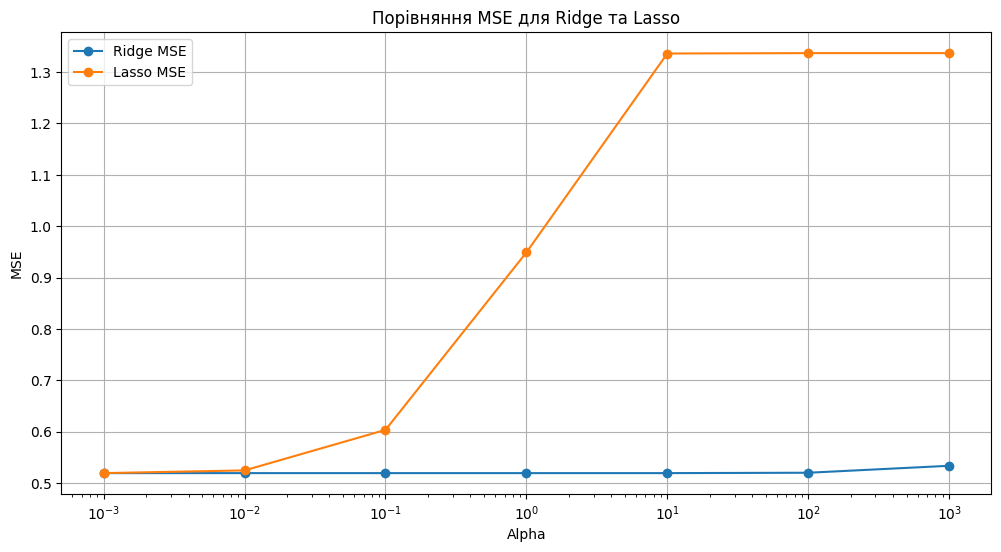

Оптимальне alpha для Ridge: 10.000
Оптимальне alpha для Lasso: 0.001
Тестова MSE для Ridge: 0.56
Тестова MSE для Lasso: 0.55


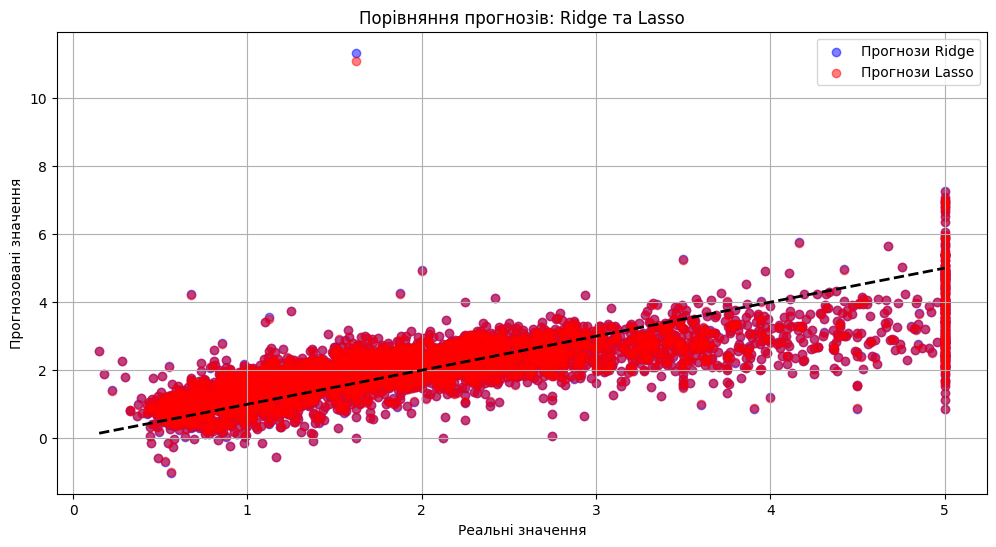

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Завантажуємо дані
california_data = fetch_california_housing()
X = pd.DataFrame(california_data.data, columns=california_data.feature_names)
y = pd.Series(california_data.target)

# Розділяємо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо базову лінійну регресійну модель
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Навчальна MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Тестова MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

if train_mse < test_mse:
    print("Схоже, модель може бути перенавчена.")
else:
    print("Модель виглядає добре, перенавчання не виявлено.")

# Регуляризація: Ridge та Lasso
alphas = np.logspace(-3, 3, 7)
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_mse.append(np.mean(cross_val_score(ridge_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)))

    lasso_model = Lasso(alpha=alpha)
    lasso_mse.append(np.mean(cross_val_score(lasso_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)))

ridge_mse = -np.array(ridge_mse)
lasso_mse = -np.array(lasso_mse)

plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_mse, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso MSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Порівняння MSE для Ridge та Lasso')
plt.legend()
plt.grid()
plt.show()

best_ridge_alpha = alphas[np.argmin(ridge_mse)]
best_lasso_alpha = alphas[np.argmin(lasso_mse)]
print(f"Оптимальне alpha для Ridge: {best_ridge_alpha:.3f}")
print(f"Оптимальне alpha для Lasso: {best_lasso_alpha:.3f}")

final_ridge_model = Ridge(alpha=best_ridge_alpha)
final_lasso_model = Lasso(alpha=best_lasso_alpha)

final_ridge_model.fit(X_train, y_train)
final_lasso_model.fit(X_train, y_train)

ridge_test_pred = final_ridge_model.predict(X_test)
lasso_test_pred = final_lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

print(f"Тестова MSE для Ridge: {ridge_test_mse:.2f}")
print(f"Тестова MSE для Lasso: {lasso_test_mse:.2f}")

plt.figure(figsize=(12, 6))
plt.scatter(y_test, ridge_test_pred, color='blue', label='Прогнози Ridge', alpha=0.5)
plt.scatter(y_test, lasso_test_pred, color='red', label='Прогнози Lasso', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Порівняння прогнозів: Ridge та Lasso')
plt.legend()
plt.grid()
plt.show()



**Висновок:**

В результаті виконання завдання з побудови регресійної моделі на базі датасету California Housing було виявлено можливе перенавчання, оскільки модель показувала значно кращі результати на навчальних даних. Для запобігання цьому було впроваджено моделі з регуляризацією — Ridge та Lasso, які зменшили середньоквадратичну помилку на тестових даних. Завдяки цьому вдалося підвищити точність прогнозування та стабільність моделі, що підкреслило важливість регуляризаційних технік у машинному навчанні для досягнення кращих результатів.

**Завдання 2. Виконати кластерізацію даних. Затосувати метод ліктя або метод силуєтів.**

Зробити візуалізацію кластерів.

Зробити висновки

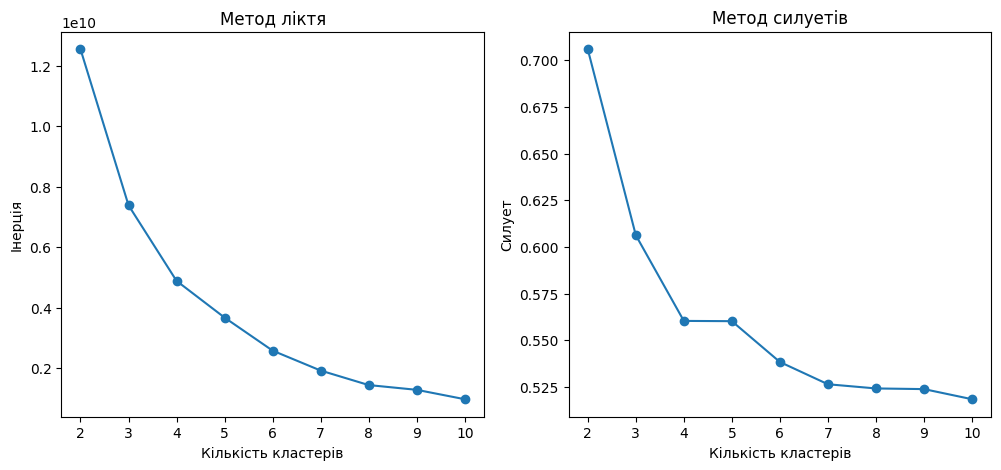

Оптимальна кількість кластерів: 2


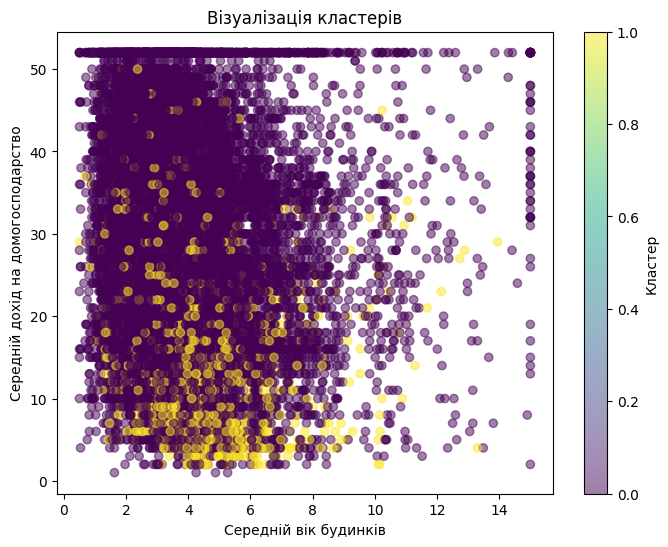

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

housing = fetch_california_housing()
X = housing.data

inertia = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.xticks(range(2, 11))
plt.show()

optimal_clusters = np.argmax(silhouette_scores) + 2
print(f'Оптимальна кількість кластерів: {optimal_clusters}')

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('Візуалізація кластерів')
plt.xlabel('Середній вік будинків')
plt.ylabel('Середній дохід на домогосподарство')
plt.colorbar(label='Кластер')
plt.show()


**Висновок:**

Після проведення кластеризації даних з використанням методу ліктя та методу силуетів, вдалося визначити оптимальну кількість кластерів для датасету California Housing. Візуалізація показала групування домогосподарств за середнім віком будинків і середнім доходом, що може бути корисним для подальшого аналізу.